In [1]:
import pandas as pd
import numpy as np
import math
def depth2(data):
    #input is a pandas data frame with gene expression values
    dt = data.T
    result = dt.apply(lambda col: (col-col.mean())/col.std())
    result = result.replace(np.nan,0)
    result = result.apply(lambda col: abs(col)).T
    return result.std()

In [2]:
import json
import pandas as pd

def TCGA_GeneExpression(sample_sheet,gdcfolder):
    #takes in metacart & gdc folder containing after downloading cart from TCGA website
    #returns dataframe of gene expression values and patient ids
    f = pd.read_csv(sample_sheet, sep='\t')
    f = f.loc[f['Sample Type'] == "Primary Tumor"]
    df = None
    for patient in zip(f['File ID'], f['File Name'], f["Sample ID"]):
        gene_exp_file = patient[0]+"/"+patient[1]
        patient_id = patient[2]
        dt = pd.read_csv(gdcfolder+gene_exp_file, sep='\t',skiprows=[0])
        dt = dt[(dt['gene_type'] == 'protein_coding')] 
        if df is None:
            df = dt[["gene_name"]]
        dt = dt[["fpkm_unstranded"]]
        dt.columns = [patient_id]
        if patient_id in df.columns:
            continue
        df = df.join(dt)
    df = df.set_index("gene_name")
    return df
df = TCGA_GeneExpression("./gdc_sample_sheet.2023-04-20.tsv","./gdc2/")
genes = df.index.values
df
#gene_save = depth2(df).to_frame().T
#gene_save.to_csv('test.csv', index = False)
#gene_save

,TCGA-B3-4103-01A,TCGA-A4-A5Y0-01A,TCGA-2Z-A9JM-01A,TCGA-UZ-A9PR-01A,TCGA-HE-A5NF-01A,TCGA-DW-7836-01A,TCGA-5P-A9KE-01A,TCGA-GL-8500-01A,TCGA-G7-6797-01A,TCGA-5P-A9JU-01A,...,TCGA-BQ-5880-01A,TCGA-BQ-7062-01A,TCGA-UZ-A9PK-01A,TCGA-A4-A7UZ-01A,TCGA-BQ-5893-01A,TCGA-G7-6789-01A,TCGA-BQ-7048-01A,TCGA-A4-8518-01A,TCGA-B9-A69E-01A,TCGA-UZ-A9PJ-01A
gene_name,,,,,,,,,,,,,,,,,,,,,
TSPAN6,15.8288,16.6039,14.4058,12.1794,11.8814,19.0159,12.7549,14.3433,13.8632,23.1471,...,10.1938,12.4374,13.0837,11.4510,19.6341,21.6474,13.5659,17.5250,7.2188,15.3126
TNMD,0.8365,0.1619,0.1945,0.0128,0.0000,0.1945,0.0123,0.0286,0.0186,22.0416,...,0.3086,0.1316,0.0270,0.0357,0.1635,0.0000,0.0161,0.1885,0.0000,1.0996
DPM1,32.7347,18.2196,30.1120,22.6276,17.0396,32.9034,18.7059,25.2109,20.1358,18.3352,...,12.7623,19.7114,22.9767,36.9515,20.5597,10.0274,16.1068,17.0990,18.5563,20.8428
SCYL3,2.6400,1.0621,1.6408,2.5458,0.9869,1.2511,1.0119,0.6688,0.8957,1.3969,...,0.8446,1.2381,1.3739,2.0758,1.3495,1.8460,1.4209,0.7459,1.0111,1.5811
C1orf112,0.7883,0.3604,0.4048,0.5023,0.3206,0.4602,0.3152,0.1627,0.3213,0.4199,...,0.1301,0.3927,0.3135,0.6303,0.7274,0.4366,0.4384,0.2203,0.4019,0.4880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AL451106.1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
AC008763.4,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0069,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
AC006486.3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [3]:
col_names = ['ABCA6', 'ABHD8', 'ABLIM2', 'ACTL7B', 'ACTL7B', 'ACTL9', 'ADA2', 'ADAM2', 'ADGRA1', 'ADGRF2', 'ADRB1', 'AFM', 'AHCY', 'AICDA', 'AKNA', 'AKR1B15', 'AKR1C1', 'AMMECR1', 'AMOTL1', 'AMY1C', 'AMY1C', 'ANAPC1', 'ANAPC1', 'ANGPT4', 'ANGPTL7', 'ANKRD12', 'ANKRD13B', 'ANKRD20A3P', 'ANKRD50', 'ANKRD53', 'ANKRD53', 'ANKRD62', 'ANP32E', 'AOAH', 'APBB1IP', 'APELA', 'APLN', 'APOBEC3A', 'APOBEC3H', 'AR', 'ARHGAP30', 'ARHGAP33', 'ARHGAP9', 'ARHGEF15', 'ARHGEF2', 'ARID1A', 'ARID1A', 'ARL10', 'ARL10', 'ARMC3', 'ASB10', 'ASB12', 'ASDURF', 'ASF1A', 'ASIC2', 'ASPG', 'ATF5', 'ATF5', 'ATP6V0A4', 'ATP6V1B1', 'AVIL', 'BBS12', 'BHLHE22', 'BMP3', 'BNIP5', 'BOD1L2', 'BRICD5', 'BRICD5', 'BRPF1', 'BRSK1', 'BRSK1', 'BRSK1', 'BRSK2', 'BRWD3', 'BSN', 'BTBD16', 'BTG2', 'BUB1', 'C10orf67', 'C11orf96', 'C12orf4', 'C16orf54', 'C16orf89', 'C17orf78', 'C1QTNF3', 'C1QTNF9', 'C1orf100', 'C1orf141', 'C1orf87', 'C20orf173', 'C2orf50', 'C3orf56', 'C3orf80', 'C3orf80', 'C3orf84', 'C4orf17', 'C4orf33', 'C6', 'C6orf141', 'C6orf15', 'C6orf163', 'C6orf58', 'C8orf88', 'C9orf135', 'CA3', 'CABP1', 'CACNA1B', 'CACNA1E', 'CACNA2D4', 'CADM2', 'CALHM6', 'CAMK1G', 'CAMK4', 'CAND2', 'CAPN13', 'CARMIL2', 'CARMIL2', 'CARNS1', 'CASP14', 'CASQ2', 'CAVIN4', 'CBLN1', 'CBLN2', 'CC2D2B', 'CCDC144A', 'CCDC177', 'CCDC182', 'CCDC42', 'CCDC83', 'CCDC89', 'CCL14', 'CCL15-CCL14', 'CCL23', 'CCL27', 'CCL3', 'CCNA1', 'CCR1', 'CCR9', 'CCR9', 'CD209', 'CD22', 'CD38', 'CD3E', 'CDH12', 'CDH7', 'CDRT15L2', 'CEACAM4', 'CELF3', 'CELSR3', 'CEP78', 'CFAP73', 'CFAP74', 'CFHR1', 'CGB8', 'CHD9', 'CHRNA3', 'CHRNB2', 'CHRND', 'CHST7', 'CLC', 'CLDN14', 'CLDN15', 'CLDN19', 'CLDN24', 'CLEC10A', 'CLEC18B', 'CLEC2D', 'CLEC2L', 'CLEC4M', 'CLVS1', 'CNPY1', 'CNR1', 'CNTN2', 'CNTNAP2', 'COL11A1', 'COL8A2', 'COLEC10', 'COMP', 'CORO7', 'CORO7-PAM16', 'CPE', 'CPLX4', 'CPXM1', 'CRB3', 'CRLS1', 'CRMP1', 'CROCC2', 'CSF1R', 'CSH2', 'CSHL1', 'CSNK2A2', 'CSRNP3', 'CST6', 'CST8', 'CSTA', 'CT47A6', 'CT47A9', 'CT47B1', 'CTCFL', 'CTNNA2', 'CTNNA3', 'CTSW', 'CTXN3', 'CUX2', 'CXCL10', 'CXCR1', 'CXCR4', 'CYBC1', 'CYP21A2', 'CYS1', 'CYTL1', 'DAZAP2', 'DCDC2C', 'DCDC2C', 'DCHS1', 'DCHS1', 'DCLRE1B', 'DDX25', 'DEFB1', 'DEFB104B', 'DEFB105B', 'DEFB107B', 'DEFB121', 'DEFB123', 'DEFB133', 'DERL2', 'DGKB', 'DLL1', 'DLX5', 'DLX6', 'DLX6', 'DMRTC2', 'DMXL2', 'DNAH12', 'DNAH8', 'DNAJC25-GNG10', 'DNAJC5G', 'DNASE1L3', 'DOCK10', 'DOCK2', 'DPP10', 'DPP10', 'DPRX', 'DPT', 'DPYSL5', 'DRC1', 'DRD5', 'DSCAML1', 'DTX1', 'DUOXA2', 'DUSP16', 'DUSP26', 'DYNC2I2', 'EEF1G', 'EFCC1', 'EFNA1', 'EFNB3', 'EGFL7', 'ELAVL3', 'ELAVL4', 'EMID1', 'EN1', 'ENC1', 'ENPP7', 'ENTPD8', 'EPHB6', 'EPHX3', 'EPOR', 'ERBB4', 'ERVV-2', 'EXOC3L2', 'EZH1', 'FABP4', 'FABP7', 'FAF1', 'FAM124B', 'FAM163A', 'FAM163A', 'FAM171A2', 'FAM180B', 'FAM181B', 'FAM205C', 'FAM236A', 'FAM237B', 'FAM25G', 'FAM47A', 'FAM47B', 'FAM72B', 'FAM72C', 'FAM90A16P', 'FAM90A8P', 'FANCA', 'FANK1', 'FBH1', 'FBLL1', 'FBLN2', 'FBXL13', 'FBXL19', 'FES', 'FEZF2', 'FFAR3', 'FGD5', 'FGF23', 'FIGN', 'FILIP1', 'FKBP5', 'FLI1', 'FLI1', 'FLRT2', 'FLT3', 'FMR1NB', 'FNDC4', 'FOXC2', 'FOXD4L5', 'FOXG1', 'FOXN3', 'FRMPD3', 'FRMPD3', 'FRRS1L', 'FSCN3', 'FSD1', 'FST', 'FTMT', 'FYB2', 'G0S2', 'G0S2', 'GABRB3', 'GABRG1', 'GAD2', 'GAGE12B', 'GAL3ST4', 'GALNT17', 'GALNTL6', 'GALNTL6', 'GAPDHS', 'GAS2L2', 'GASK1A', 'GAST', 'GDF10', 'GDF6', 'GJA4', 'GK2', 'GLOD5', 'GLOD5', 'GLUL', 'GLYATL1B', 'GNB5', 'GNG14', 'GNG7', 'GOLGA6L22', 'GOLGA8M', 'GOLGA8R', 'GOLGA8T', 'GPR119', 'GPR137C', 'GPR156', 'GPR162', 'GPR18', 'GPR20', 'GPR33', 'GPR33', 'GPR34', 'GPR42', 'GPR78', 'GPR78', 'GPR82', 'GPR85', 'GPSM3', 'GPX6', 'GRAP', 'GRIA1', 'GRIA4', 'GRIK5', 'GRM2', 'GRM4', 'GRM7', 'GSC', 'GSC2', 'GSDMA', 'GSDMB', 'GSDMC', 'GTF2A1L', 'GUCA2B', 'H2AC1', 'H2BC1', 'H2BC10', 'H2BU1', 'H2BW2', 'H2BW2', 'HAAO', 'HAPLN4', 'HCST', 'HEPACAM', 'HES1', 'HES4', 'HES6', 'HFM1', 'HFM1', 'HHIP', 'HIRIP3', 'HMGB2', 'HOPX', 'HORMAD2', 'HOXB2', 'HOXC13', 'HOXD3', 'HSD17B13', 'HSP90AB1', 'HSPA4L', 'HSPB2', 'HTR1B', 'HTR3A', 'HTR3D', 'ICOSLG', 'IDO1', 'IFNAR2', 'IFNB1', 'IGF2BP1', 'IGFBPL1', 'IGSF10', 'IGSF9B', 'IKZF1', 'IL12RB1', 'IL1A', 'IL25', 'IL26', 'IL5', 'INA', 'INA', 'INHBE', 'INS', 'IRAK1BP1', 'IRF1', 'IRGQ', 'ISL1', 'ITPR1', 'JAK3', 'JPH4', 'KASH5', 'KATNAL2', 'KBTBD8', 'KCNA1', 'KCND2', 'KCNE5', 'KCNG1', 'KCNH4', 'KCNK10', 'KCNK3', 'KCNK4', 'KCNN1', 'KCNN3', 'KCNT1', 'KCNV2', 'KCTD16', 'KDM2B', 'KDR', 'KHDC3L', 'KIAA1210', 'KIF19', 'KIF1A', 'KIF26A', 'KIF5C', 'KIFC1', 'KLHDC7B', 'KLHL41', 'KLK2', 'KLK3', 'KLRC4', 'KMT5C', 'KRT28', 'KRT34', 'KRT36', 'KRT71', 'KRT77', 'KRTAP10-10', 'KRTAP10-9', 'KRTAP12-1', 'KRTAP15-1', 'KRTAP19-5', 'KRTAP2-4', 'KRTAP2-4', 'KRTAP4-2', 'LAMP3', 'LANCL1', 'LBP', 'LCE1C', 'LCE2B', 'LCMT1', 'LCP1', 'LELP1', 'LGALS14', 'LGALS9', 'LGI1', 'LGI3', 'LHB', 'LHX9', 'LILRB3', 'LINGO1', 'LIX1L', 'LPGAT1', 'LRP2', 'LRRC3C', 'LRRC4', 'LRRC4B', 'LRRC4C', 'LRRC52', 'LRRC55', 'LRRC73', 'LRRK1', 'LSM14A', 'LSS', 'LTA4H', 'LTBP2', 'LUC7L3', 'LY6D', 'LY9', 'LYZL2', 'MACROD2', 'MAGEL2', 'MAGEL2', 'MAP1B', 'MAP2', 'MAPKAPK5', 'MARCHF11', 'MARCKSL1', 'MCC', 'MCM7', 'MEGF11', 'MEIS1', 'MEP1B', 'MEX3A', 'MFN2', 'MGARP', 'MGAT1', 'MINDY4B', 'MLC1', 'MLLT10', 'MPDZ', 'MPEG1', 'MPP4', 'MPZ', 'MRGPRG', 'MRGPRX1', 'MROH2A', 'MS4A14', 'MS4A7', 'MT1B', 'MT1F', 'MTRNR2L5', 'MUC17', 'MUCL1', 'MYADML2', 'MYBPC2', 'MYBPH', 'MYBPHL', 'MYH7', 'MYO18B', 'MYO1G', 'MYO1H', 'MYO7A', 'MYOM2', 'MYOZ3', 'MYT1', 'N4BP2L1', 'NAA15', 'NANOG', 'NANOS3', 'NCAPG', 'NCF2', 'NCR3', 'NEFM', 'NELL2', 'NETO1', 'NFASC', 'NFATC3', 'NFKB2', 'NKX2-6', 'NKX3-2', 'NLRP13', 'NLRP5', 'NME5', 'NMS', 'NPBWR2', 'NPFFR2', 'NPIPA8', 'NPIPB8', 'NPTX1', 'NPVF', 'NPY2R', 'NRROS', 'NRSN1', 'NUDT21', 'NUGGC', 'NXF2B', 'NXPE1', 'NXPH3', 'OGN', 'OLFM2', 'OLFM2', 'OLIG2', 'OPRL1', 'OPRM1', 'OR11L1', 'OR13C8', 'OR13C9', 'OR14A2', 'OR1A2', 'OR1D2', 'OR1E2', 'OR2T2', 'OR2T3', 'OR2T4', 'OR3A3', 'OR3A3', 'OR4F6', 'OR4N2', 'OR51S1', 'OR52E8', 'OR52L1', 'OR5A2', 'OR5AK2', 'OR5K1', 'OR5T1', 'OR5T2', 'OR6K2', 'OR6K2', 'OR8H1', 'ORM2', 'OTOGL', 'P2RX7', 'P2RY10', 'PAEP', 'PAGE5', 'PAK5', 'PAMR1', 'PASD1', 'PATZ1', 'PAX5', 'PAX7', 'PCDH9', 'PCDHA12', 'PCDHA8', 'PCDHB1', 'PCYT1B', 'PDE4B', 'PEBP4', 'PGBD5', 'PHC1', 'PHEX', 'PHF21B', 'PHF8', 'PHOX2A', 'PHYHD1', 'PHYHIPL', 'PI3', 'PIANP', 'PIK3CG', 'PIK3R1', 'PIWIL1', 'PJA2', 'PLA2G4D', 'PLAT', 'PLCL1', 'PLEKHO1', 'PLGLB2', 'PLGLB2', 'PLPPR4', 'PM20D2', 'PMCH', 'PNCK', 'PODN', 'POLA2', 'POLR2I', 'POTEJ', 'PPFIA2', 'PPM1E', 'PPP1R27', 'PPP3R2', 'PRAM1', 'PRAMEF17', 'PRAMEF17', 'PRAMEF20', 'PRDM12', 'PREX1', 'PRKDC', 'PRM2', 'PROB1', 'PROZ', 'PRR20B', 'PRR35', 'PRRT4', 'PRSS33', 'PRSS55', 'PRSS56', 'PRSS57', 'PRSS58', 'PSG4', 'PSORS1C2', 'PTBP2', 'PTGDR2', 'PTGER3', 'QRICH2', 'RAB27A', 'RAB33A', 'RAB37', 'RAB3C', 'RAB3C', 'RAB7B', 'RAD17', 'RAD21L1', 'RAET1L', 'RAG1', 'RAMACL', 'RAPGEF4', 'RAPGEF4', 'RARRES2', 'RASGRP2', 'RBM38', 'RBM5', 'RBMX', 'RCAN1', 'RCSD1', 'RCSD1', 'RD3', 'RDH16', 'REEP2', 'REL', 'REM1', 'RERGL', 'RFC3', 'RFX6', 'RGMA', 'RGS21', 'RIC1', 'RIMS3', 'RIPOR2', 'RLN3', 'RNASE9', 'RNF165', 'RNF212B', 'RP1', 'RP1L1', 'RPN1', 'RPS15A', 'RSBN1L', 'RSPO3', 'S100A2', 'S100A7A', 'S1PR4', 'SAA1', 'SALL2', 'SAMD13', 'SASS6', 'SBK1', 'SBK1', 'SCGB1D2', 'SCGB2A2', 'SCML2', 'SCN2A', 'SCNN1B', 'SCRG1', 'SCRT2', 'SDK2', 'SDR9C7', 'SEMA6A', 'SENP3', 'SERPINA12', 'SERPINE3', 'SERPINI2', 'SERTM2', 'SESN3', 'SFTPD', 'SGIP1', 'SH2D1A', 'SH2D1B', 'SH3GL2', 'SHOC1', 'SHOX', 'SIGLEC15', 'SIGLEC15', 'SLA2', 'SLC13A5', 'SLC17A2', 'SLC17A3', 'SLC18A2', 'SLC19A2', 'SLC24A3', 'SLC25A2', 'SLC26A5', 'SLC29A4', 'SLC35F4', 'SLC38A8', 'SLC39A12', 'SLC3A1', 'SLC51B', 'SLC5A11', 'SLC6A4', 'SLC7A14', 'SLC9B1', 'SLC9C2', 'SLCO1B1', 'SMARCD1', 'SMIM18', 'SMLR1', 'SNAP25', 'SNAP29', 'SNAP91', 'SNTB1', 'SNX10', 'SNX22', 'SNX22', 'SOGA3', 'SOX10', 'SOX11', 'SP140L', 'SPAG11B', 'SPAM1', 'SPATA21', 'SPATA31A3', 'SPATA6L', 'SPIC', 'SPINK7', 'SPTA1', 'SRGN', 'SRSF12', 'SST', 'SSTR4', 'SSU72P4', 'SSX5', 'ST3GAL6', 'ST6GALNAC3', 'ST8SIA4', 'STK33', 'STON1-GTF2A1L', 'STUM', 'SULF2', 'SULT1C3', 'SULT1C3', 'SULT1C3', 'SULT1E1', 'SYN3', 'SYT11', 'SYT3', 'SYT9', 'TAAR9', 'TAF5', 'TAF9', 'TAFA3', 'TAFA4', 'TAMALIN', 'TARDBP', 'TAS2R30', 'TBC1D3D', 'TBC1D3F', 'TCF3', 'TCP11', 'TCP11X1', 'TEN1', 'TENM1', 'TEX35', 'TEX45', 'TFDP3', 'TGM6', 'THSD7A', 'THUMPD3', 'THY1', 'THYN1', 'TIFAB', 'TIFAB', 'TIMM8B', 'TMCC2', 'TMEM114', 'TMEM131L', 'TMEM178B', 'TMEM179', 'TMEM235', 'TMEM72', 'TMEM81', 'TMPRSS11B', 'TMPRSS11D', 'TMSB15A', 'TNP2', 'TOMM6', 'TPD52L3', 'TPH1', 'TPRX1', 'TPSAB1', 'TPSD1', 'TRANK1', 'TRAPPC1', 'TRARG1', 'TRAT1', 'TRIM33', 'TRIM64', 'TRIML2', 'TRIT1', 'TRO', 'TRPM1', 'TSPAN16', 'TSPY9P', 'TSSK1B', 'TTBK1', 'TTC24', 'TTC8', 'TTR', 'TUB', 'TUB', 'TUBB8B', 'TUG1', 'TXNDC8', 'TYR', 'UBE2G1', 'UBR7', 'UCN3', 'UCP1', 'UCP2', 'UGT2A2', 'UHRF2', 'UNC13A', 'UNC79', 'UNC93A', 'URAD', 'URB2', 'USH1G', 'USP13', 'USP17L11', 'USP17L17', 'USP17L22', 'USP17L23', 'UTP20', 'UTY', 'VASH1', 'VCY1B', 'VGF', 'VGF', 'VHLL', 'VILL', 'VN1R4', 'VRTN', 'VSIG10L2', 'VSIG4', 'VSX2', 'VWF', 'VXN', 'VXN', 'WAS', 'WDR17', 'WDR86', 'WNT1', 'WNT16', 'XAGE1A', 'XIRP2', 'XKR7', 'XKR7', 'YLPM1', 'ZACN', 'ZAN', 'ZBTB8B', 'ZDHHC17', 'ZFHX2', 'ZFHX3', 'ZFHX4', 'ZFP42', 'ZFP57', 'ZFP92', 'ZFPM2', 'ZGRF1', 'ZMAT4', 'ZMYND10', 'ZNF107', 'ZNF135', 'ZNF140', 'ZNF142', 'ZNF157', 'ZNF177', 'ZNF235', 'ZNF292', 'ZNF469', 'ZNF490', 'ZNF492', 'ZNF548', 'ZNF569', 'ZNF610', 'ZNF678', 'ZNF682', 'ZNF683', 'ZNF70', 'ZNF705A', 'ZNF709', 'ZNF711', 'ZNF723', 'ZNF724', 'ZNF730', 'ZNF746', 'ZNF816', 'ZNF891', 'ZNF92', 'ZNF93', 'ZPBP', 'ZSCAN29']

In [4]:
import pandas as pd

def load_cell_data():
    cell_data = pd.read_csv("./rnaseq_all_data_20220624.csv")
    cell_data = cell_data[cell_data['gene_symbol'].isin(genes)]
    cell_line_exp = cell_data.pivot_table(index='gene_symbol', columns='model_id', values='tpm')
    cell_line_exp.columns.name = None
    cell_line_exp = cell_line_exp.fillna(0)
    return cell_line_exp

In [5]:
def normalize(df):
    return df.applymap(lambda x: np.log2(x+1))

In [6]:
cell_line_exp = load_cell_data()
df = cell_line_exp.T
df = df.apply(lambda x: (x-x.mean())/x.std())
df = df.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df = df.fillna(0)
df

gene_symbol,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
SIDM00001,0.058050,0.000221,0.000053,0.000000,0.000000,0.000985,0.000000,0.150448,0.148089,0.000000,...,0.252406,0.383896,0.013451,0.050746,0.063085,0.035670,0.085962,0.028090,0.131340,0.117341
SIDM00002,0.085433,0.000000,0.000120,0.004209,0.105533,0.035680,0.000000,0.644907,0.096520,0.000138,...,0.223970,0.170986,0.033245,0.079011,0.454725,0.025692,0.316636,0.056060,0.272214,0.372915
SIDM00003,0.053669,0.000000,0.004674,0.000000,0.031762,0.000000,0.000000,0.449977,0.142499,0.000000,...,0.568002,0.437820,0.016170,0.045750,0.132263,0.165503,0.300144,0.179565,0.289985,0.369116
SIDM00005,0.360350,0.000000,0.000140,0.001403,0.054303,0.005259,0.007540,0.620920,0.373189,0.000000,...,0.285150,0.430743,0.042933,0.065076,0.230195,0.047643,0.146568,0.025951,0.142992,0.221883
SIDM00006,0.061336,0.000294,0.013820,0.000000,0.060451,0.026611,0.000000,0.188250,0.071306,0.000000,...,0.285366,0.171762,0.021954,0.054427,0.122565,0.207782,0.279530,0.525651,0.144992,0.268126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SIDM02076,0.000000,0.003089,0.000000,0.006719,0.010246,0.011169,0.001455,0.121983,0.184940,0.006031,...,0.055364,0.057819,0.010664,0.013015,0.069951,0.000000,0.018244,0.076253,0.041544,0.000000
SIDM02077,0.002191,0.010443,0.000000,0.000000,0.000000,0.009533,0.000000,0.327691,0.345921,0.000138,...,0.049763,0.033912,0.015612,0.045290,0.380997,0.000374,0.168728,0.318795,0.158880,0.000000
SIDM02078,0.000000,0.014046,0.000014,0.000665,0.000000,0.042779,0.006878,0.200091,0.948774,0.016338,...,0.104122,0.045675,0.013242,0.056662,0.142048,0.000000,0.050917,0.194630,0.123102,0.000000
SIDM02079,0.000000,0.000147,0.000181,0.000000,0.005123,0.005389,0.017593,0.226127,0.636281,0.010485,...,0.076691,0.100502,0.011360,0.044699,0.079907,0.000499,0.055865,0.029140,0.131105,0.000000


In [7]:
def Subset_Genes(gene_expression, genes):
    gene_expression = gene_expression[gene_expression.index.isin(genes)]
    return gene_expression

In [11]:
from concrete_autoencoder import ConcreteAutoencoderFeatureSelector
from keras.layers import Dense, Dropout, LeakyReLU
import numpy as np

def f(x):
    x = Dense(1500)(x)
    x = LeakyReLU(0.1)(x)
    x = Dropout(0.1)(x)
    x = Dense(300)(x)
    x = LeakyReLU(0.1)(x)
    x = Dropout(0.1)(x)
    x = Dense(19263)(x)
    return x

selector = ConcreteAutoencoderFeatureSelector(K = 1000, batch_size = 50, output_function = f, num_epochs = 30, learning_rate=0.002, start_temp=10, min_temp=0.1, tryout_limit = 1 )

In [12]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)
train_np = train.to_numpy()
test_np = test.to_numpy()
train_np = train_np.astype(np.float32)
test_np = test_np.astype(np.float32)
print(train.shape)
print(test.shape)

(1144, 19263)
(287, 19263)


In [13]:
selector.fit(train_np, train_np, test_np, test_np)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 19263)]           0         
                                                                 
 concrete_select (ConcreteSe  (None, 1000)             19263001  
 lect)                                                           
                                                                 
 dense_3 (Dense)             (None, 1500)              1501500   
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 1500)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1500)              0         
                                                                 
 dense_4 (Dense)             (None, 300)               450300    
                                                           

In [14]:
idx = selector.get_indices()
selected_cols = df.iloc[:, idx]
col_names = selected_cols.columns.tolist()
col_names.sort()
print(col_names)

['A2M', 'AADACL2', 'AATK', 'ABCA3', 'ABCB1', 'ABCB11', 'ABCE1', 'ABHD12', 'ACOT13', 'ACSL4', 'ACSM5', 'ACTR2', 'ADAM22', 'ADAMTS15', 'ADGRF2', 'ADGRG6', 'ADH1C', 'ADPRS', 'ADRB2', 'AFG3L2', 'AFTPH', 'AHCTF1', 'AHCYL2', 'AHNAK2', 'AK9', 'AKAP12', 'AKAP8L', 'ALDH3B2', 'ALG11', 'ALG14', 'ALPG', 'ALS2', 'AMY1C', 'ANAPC1', 'ANGPTL7', 'ANKRD29', 'ANKRD6', 'ANP32B', 'ANP32B', 'ANP32E', 'AOC2', 'AP2A1', 'APEX1', 'APOL1', 'APOL5', 'ARGLU1', 'ARHGAP11A', 'ARHGAP30', 'ARHGAP32', 'ARHGEF38', 'ARMC10', 'ARMC12', 'ARMC5', 'ARMCX5-GPRASP2', 'ARRDC5', 'ARSA', 'ART3', 'ART5', 'ASB6', 'ASPG', 'ATAT1', 'ATOH1', 'ATP5F1D', 'ATP8B3', 'ATPAF2', 'ATXN3L', 'AURKA', 'AVIL', 'AVPI1', 'B3GALT5', 'BBOF1', 'BBOX1', 'BBX', 'BCAT1', 'BCL2L13', 'BCL6', 'BCL9', 'BET1L', 'BLCAP', 'BMP4', 'BMX', 'BOD1L1', 'BRD2', 'BRINP2', 'BSDC1', 'BTBD19', 'BTBD8', 'C11orf53', 'C11orf95', 'C11orf98', 'C12orf57', 'C15orf61', 'C16orf96', 'C18orf32', 'C1QL3', 'C1QTNF4', 'C1orf52', 'C20orf27', 'C2CD6', 'CAAP1', 'CAAP1', 'CABLES2', 'CACNA1

In [15]:
#Code to subset the genes from the gene expression data
cell_line_exp = normalize(cell_line_exp)
cell_line_exp_subset = cell_line_exp[cell_line_exp.index.isin(col_names)]
cell_line_random_set = cell_line_exp.sample(n=200)

#cell_line_exp_subset = normalize(cell_line_exp_subset)
cell_line_exp_subset

,SIDM00001,SIDM00002,SIDM00003,SIDM00005,SIDM00006,SIDM00007,SIDM00008,SIDM00009,SIDM00011,SIDM00014,...,SIDM02071,SIDM02072,SIDM02073,SIDM02074,SIDM02075,SIDM02076,SIDM02077,SIDM02078,SIDM02079,SIDM02080
gene_symbol,,,,,,,,,,,,,,,,,,,,,
A2M,0.411426,0.807355,4.913608,0.903038,6.445760,0.097611,0.084064,0.097611,8.177619,0.163499,...,0.056584,0.097611,2.786596,0.028569,0.495695,0.000000,0.000000,0.124328,1.090853,0.286881
AADACL2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AATK,1.500802,4.510962,0.137504,2.344828,1.226509,0.790772,1.084064,0.097611,5.506526,2.961623,...,2.533563,2.577731,1.495695,2.232661,4.223423,2.077243,3.080658,2.720278,0.757023,2.891419
ABCA3,3.250962,4.300856,0.389567,5.517906,4.397803,5.832890,0.941106,2.935460,2.283922,0.713696,...,3.911692,3.232661,1.000000,1.594549,0.475085,1.700440,3.061776,2.625270,3.184280,4.705978
ABCB1,2.992768,0.097611,3.261531,0.000000,3.467279,7.638581,0.000000,1.978196,0.137504,3.798051,...,0.028569,5.485427,4.847997,0.189034,4.251719,0.000000,6.484944,2.295723,0.070389,5.439291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF852,2.543496,2.286881,1.700440,3.326250,1.495695,2.070389,1.214125,2.702658,1.422233,2.518535,...,1.327687,1.130931,1.757023,1.570463,2.563158,1.007196,1.405992,1.269033,1.372952,1.448901
ZNHIT2,4.509062,5.675534,3.984589,4.266787,5.111866,4.880196,4.516646,4.018812,3.189034,4.977738,...,4.145677,5.066089,4.229588,4.313246,4.020591,3.077243,3.899176,3.638074,3.564378,4.895303
ZNRF3,0.097611,0.678072,0.815575,0.298658,0.887525,0.575312,0.124328,0.137504,0.286881,1.851999,...,4.740388,5.545042,5.732541,3.329124,6.413797,1.361768,5.537296,2.403268,3.619413,4.740388


In [16]:
from scipy.stats import spearmanr

def spearman(ITH, drug, store, ic50_values):
    ITH = ITH.to_frame().reset_index()
    ITH.columns = ["model_id", "ITH"]
    merged_df = pd.merge(ITH, ic50_values, on='model_id')
    ith = merged_df["ITH"]
    IC50 = merged_df["IC50"]
    corr, p_value = spearmanr(ith, IC50)
    #print(corr, end=' ')
    store[drug] = (corr,p_value)

In [17]:
import os
d1,d2,d3 = dict(), dict(), dict()
ith1 = depth2(cell_line_exp)
ith2 = depth2(cell_line_exp_subset)
ith3 = depth2(cell_line_random_set)
folder_path = './data/'
# Iterate over all files in the folder
for filename in os.listdir(folder_path):
    if os.path.isfile(os.path.join(folder_path, filename)):
        ic50 = pd.read_csv("./data/"+filename)
        spearman(ith1, filename[:filename.find('.')], d1, ic50)
        spearman(ith2, filename[:filename.find('.')], d2, ic50)
        spearman(ith3, filename[:filename.find('.')], d3, ic50)

In [18]:
def create_spearman_table(d):
    dd = pd.DataFrame(d).T.reset_index()
    dd.columns = ["Drug", "ρ", "P"]
    dd['P'] = dd['P'].apply(lambda x: -np.log(x))
    dd = dd.sort_values(by=['P'], ascending=False)
    return dd

In [19]:
import matplotlib.pyplot as plt

def scatter_plot(dataframe, name):
    # create scatter plot
    fig, ax = plt.subplots()
    for i, row in dataframe.iterrows():
        if row['P'] <= 1.3:
            ax.scatter(row['ρ'], row['P'], color='grey')
        elif row['ρ'] <= 0 :
            ax.scatter(row['ρ'], row['P'], color='red')
        else:
            ax.scatter(row['ρ'], row['P'], color='blue')
    plt.xlim(-0.5, 0.5)
    plt.ylim(0, 90)
    ax.set_title(name)
    ax.set_xlabel('ρ (DEPTH2 Score vs. IC50 value)')
    ax.set_ylabel('-Log10P')
    ax.legend()
    figure = plt.gcf()
    figure.set_size_inches(7, 7)
    plt.savefig('my_plot.png', bbox_extra_artists=[ax], pad_inches=0.1, dpi=300)
    plt.show()

In [20]:
def box_plot(data):
    fig, ax = plt.subplots()
    ax.boxplot(data)

    q1, median, q3 = np.percentile(data, [25, 50, 75])
    minimum = np.min(data)
    maximum = np.max(data)
    # Add quartile annotations
    ax.text(0.95, q1, "Q1: {:.2f}".format(q1), ha='right', va='center', color='blue')
    ax.text(0.95, median, "Median: {:.2f}".format(median), ha='right', va='center', color='green')
    ax.text(0.95, q3, "Q3: {:.2f}".format(q3), ha='right', va='center', color='red')
    ax.text(1.1, minimum, "Min: {:.2f}".format(minimum), ha='left', va='center', color='purple', fontsize=12, fontweight='bold')
    ax.text(1.1, maximum, "Max: {:.2f}".format(maximum), ha='left', va='center', color='orange', fontsize=12, fontweight='bold')
    # Set the axis labels
    figure = plt.gcf()
    figure.set_size_inches(8, 8)
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


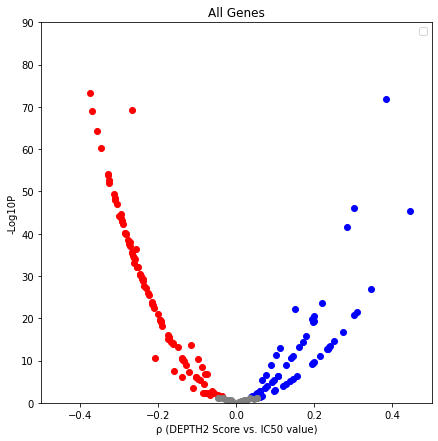

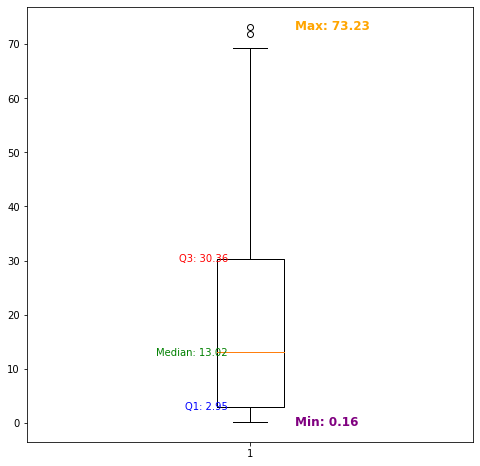

In [21]:
data = create_spearman_table(d1)
scatter_plot(data, "All Genes")
#box_plot(data['ρ'])
box_plot(data['P'])
#data

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


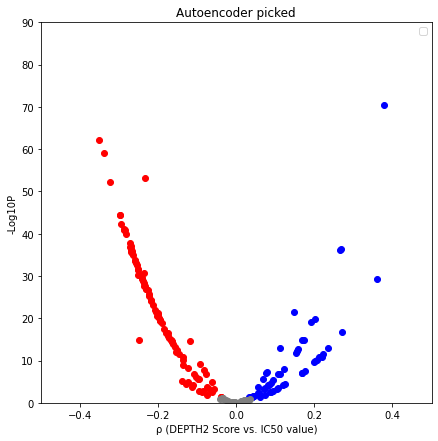

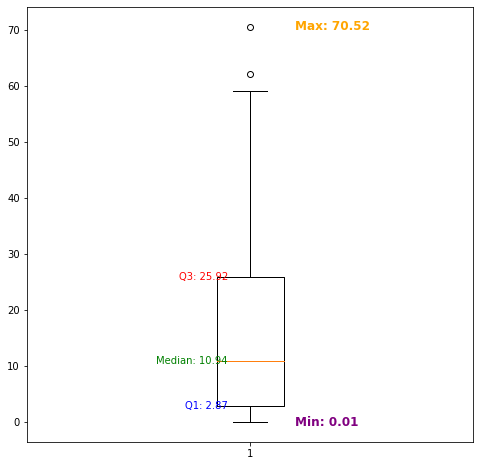

In [22]:
data = create_spearman_table(d2)
scatter_plot(data, "Autoencoder picked")
#box_plot(data['ρ'])
box_plot(data['P'])
#data

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


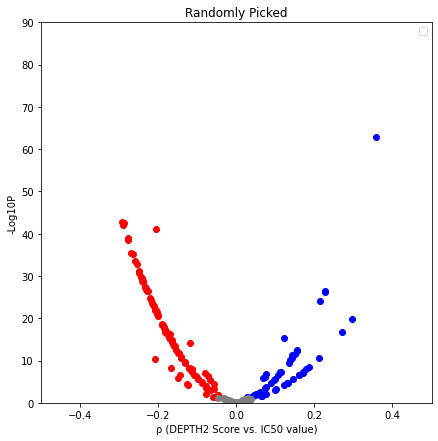

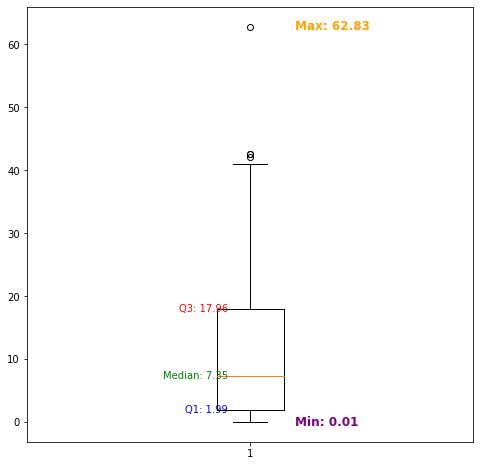

In [23]:
data = create_spearman_table(d3)
scatter_plot(data, "Randomly Picked")
#box_plot(data['ρ'])
box_plot(data['P'])
#data